In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [114]:
# Lista de tickers
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']

# Baixando os dados dos tickers
carteira = yf.download(tickers, start="2002-01-01", end="2023-12-31")['Adj Close']

# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01", end="2023-12-31")['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [115]:
carteira_normalizada = (carteira / carteira.iloc[0])*8333.33
ibov_normalizado = (ibov / ibov.iloc[0])*50000

In [116]:
carteira_normalizada['saldo_op'] = 0
#carteira_normalizada['saldo']= carteira_normalizada.sum(axis=1)
carteira_normalizada

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo_op
Date,,,,,,
2002-01-01,8333.330000,8333.330000,8333.330000,8333.330000,8333.330000,0
2002-01-02,8482.844473,8333.330000,8712.613344,8349.619736,8173.073845,0
2002-01-03,8616.619244,8396.772011,8617.438032,8406.640132,8301.280864,0
2002-01-04,8419.886604,8365.046652,8475.854399,8354.506277,8477.559754,0
2002-01-07,8231.033694,8396.772011,8381.631522,8536.975716,8477.559754,0
...,...,...,...,...,...,...
2023-12-21,838219.782963,121035.496191,161975.099239,179925.878598,323694.506824,0
2023-12-22,840535.625563,121336.323098,164543.811463,181656.418414,321255.330370,0
2023-12-26,848255.502283,121820.053073,166223.309479,184573.613527,322390.832759,0


In [117]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2002-01-02     50000.000000
2002-01-03     51416.522491
2002-01-04     51658.016148
2002-01-07     51827.422145
2002-01-08     51066.897347
                  ...      
2023-12-21    476434.544406
2023-12-22    478492.647059
2023-12-26    481304.065744
2023-12-27    483686.562860
2023-12-28    483654.123414
Name: Adj Close, Length: 5447, dtype: float64

In [118]:
resultados_straddle = pd.read_json(r'C:\Users\cptfr\Desktop\TCC_B3_OPCOES\estrategias\resultados_straddle.json')
print(resultados_straddle)

     Data_Entrada  Data_Vencimento      Tipo     Ativo  ResultadosTotais
0        20030702         20030818  STRADDLE  PETR4.SA             30.00
1        20031110         20031215  STRADDLE  PETR4.SA             30.00
2        20050114         20050221  STRADDLE  PETR4.SA            -30.00
3        20051111         20051219  STRADDLE  VALE3.SA            -23.65
4        20060329         20060515  STRADDLE  PETR4.SA             30.00
..            ...              ...       ...       ...               ...
297      20231101         20231215  STRADDLE  BBAS3.SA             30.00
298      20230404         20230519  STRADDLE  BBDC3.SA             30.00
299      20230502         20230616  STRADDLE  BBDC3.SA             30.00
300      20230712         20230818  STRADDLE  BBDC3.SA              1.00
301      20231010         20231117  STRADDLE  BBDC3.SA             20.48

[302 rows x 5 columns]


In [119]:
carteira_opcoes = pd.DataFrame(index = carteira_normalizada.index,columns=['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA'])
colunas_modificar = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']
carteira_opcoes.loc[carteira_opcoes.index[0], colunas_modificar] = 1666.66
carteira_opcoes['saldo']= carteira_opcoes.sum(axis=1)
carteira_opcoes.index = carteira_opcoes.index.strftime("%Y%m%d")
carteira_opcoes.index = carteira_opcoes.index.astype(int)
carteira_opcoes.reset_index(inplace=True)
carteira_opcoes

,Date,PETR4.SA,VALE3.SA,ITUB4.SA,BBAS3.SA,BBDC3.SA,saldo
0,20020101,1666.66,1666.66,1666.66,1666.66,1666.66,8333.3
1,20020102,NaN,NaN,NaN,NaN,NaN,0.0
2,20020103,NaN,NaN,NaN,NaN,NaN,0.0
3,20020104,NaN,NaN,NaN,NaN,NaN,0.0
4,20020107,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
5500,20231221,NaN,NaN,NaN,NaN,NaN,0.0
5501,20231222,NaN,NaN,NaN,NaN,NaN,0.0
5502,20231226,NaN,NaN,NaN,NaN,NaN,0.0
5503,20231227,NaN,NaN,NaN,NaN,NaN,0.0


In [120]:
for dia in carteira_opcoes['Date']:
    #print(dia)
    if dia in resultados_straddle['Data_Vencimento'].values:
        print(dia)
        posicao = carteira_opcoes.query('Date == @dia')
        posicao = int(posicao.index[0])
        ativo = resultados_straddle.loc[resultados_straddle['Data_Vencimento'] == dia, 'Ativo']
        # AQUI TA O BO
        print("ATIVOS NESTA DATA: \n {}".format(ativo))
        for ativos in ativo:
            print(ativos)
            #ativo = resultados_straddle.loc[resultados_straddle['Data_Vencimento'] == dia, 'Ativo'].iloc[0]
            resultado = resultados_straddle.loc[(resultados_straddle['Data_Vencimento'] == dia) & (resultados_straddle['Ativo'] == ativos), 'ResultadosTotais'].iloc[0]
            posicao_anterior = posicao - 1
            #print(ativos, resultado)
            for coluna in carteira_opcoes.columns:
                print(coluna)
                if coluna == ativos:
                    print("Resultado {}".format(resultado))
                    if resultado >=0:
                        print("Aumentando")
                        carteira_opcoes.loc[posicao, ativos] = (carteira_opcoes.loc[posicao_anterior, ativos]) * (1 + resultado/100)
                        #carteira_opcoes.loc[posicao, 'saldo'] = carteira_opcoes.loc[posicao, ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']].sum()
                    if resultado < 0:
                        print("Diminuindo")
                        carteira_opcoes.loc[posicao, ativos] = carteira_opcoes.loc[posicao_anterior, ativos] * (1 + resultado/100)
                        #carteira_opcoes.loc[posicao, 'saldo'] = carteira_opcoes.loc[posicao, ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']].sum()
                elif coluna not in ativo.values:
                    if coluna != 'Date' and coluna != 'saldo':
                        print('Alterando {}'.format(coluna))
                        carteira_opcoes.loc[posicao, coluna] = carteira_opcoes.loc[posicao_anterior, coluna]
            carteira_opcoes.loc[posicao, 'saldo'] = carteira_opcoes.loc[posicao, ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']].sum()
    elif dia!= carteira_opcoes['Date'].loc[0]:
        posicao = carteira_opcoes.query('Date == @dia')
        posicao = int(posicao.index[0])
        #print(posicao)
        #print(carteira_opcoes.loc[posicao])
        posicao_anterior = posicao - 1
        # Lista de colunas a serem modificadas
        colunas_mod = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA', 'saldo']
        # Usando .loc para acessar a linha e colunas_mod específicas e definir os valores de uma vez
        carteira_opcoes.loc[posicao, colunas_mod] = carteira_opcoes.loc[posicao_anterior, colunas_mod]

20030818
ATIVOS NESTA DATA: 
 0    PETR4.SA
Name: Ativo, dtype: object
PETR4.SA
Date
PETR4.SA
Resultado 30.0
Aumentando
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20031215
ATIVOS NESTA DATA: 
 1    PETR4.SA
Name: Ativo, dtype: object
PETR4.SA
Date
PETR4.SA
Resultado 30.0
Aumentando
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20050221
ATIVOS NESTA DATA: 
 2    PETR4.SA
Name: Ativo, dtype: object
PETR4.SA
Date
PETR4.SA
Resultado -30.0
Diminuindo
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20051219
ATIVOS NESTA DATA: 
 3    VALE3.SA
Name: Ativo, dtype: object
VALE3.SA
Date
PETR4.SA
Alterando PETR4.SA
VALE3.SA
Resultado -23.65
Diminuindo
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20060515
ATIVOS NESTA DATA: 
 4    PETR4.SA
N

In [121]:
carteira_opcoes

,Date,PETR4.SA,VALE3.SA,ITUB4.SA,BBAS3.SA,BBDC3.SA,saldo
0,20020101,1666.66,1666.66,1666.66,1666.66,1666.66,8333.300000
1,20020102,1666.66,1666.66,1666.66,1666.66,1666.66,8333.300000
2,20020103,1666.66,1666.66,1666.66,1666.66,1666.66,8333.300000
3,20020104,1666.66,1666.66,1666.66,1666.66,1666.66,8333.300000
4,20020107,1666.66,1666.66,1666.66,1666.66,1666.66,8333.300000
...,...,...,...,...,...,...,...
5500,20231221,206.042148,174.44753,38.278653,80.608534,83.553185,582.930049
5501,20231222,206.042148,174.44753,38.278653,80.608534,83.553185,582.930049
5502,20231226,206.042148,174.44753,38.278653,80.608534,83.553185,582.930049
5503,20231227,206.042148,174.44753,38.278653,80.608534,83.553185,582.930049


In [122]:
carteira_opcoes.set_index('Date', inplace=True)
carteira_opcoes.index = pd.to_datetime(carteira_opcoes.index, format='%Y%m%d')
carteira_opcoes['saldo']

Date
2002-01-01    8333.300000
2002-01-02    8333.300000
2002-01-03    8333.300000
2002-01-04    8333.300000
2002-01-07    8333.300000
                 ...     
2023-12-21     582.930049
2023-12-22     582.930049
2023-12-26     582.930049
2023-12-27     582.930049
2023-12-28     582.930049
Name: saldo, Length: 5505, dtype: float64

In [123]:
carteira_normalizada['saldo_op'] = carteira_opcoes['saldo']
carteira_normalizada

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo_op
Date,,,,,,
2002-01-01,8333.330000,8333.330000,8333.330000,8333.330000,8333.330000,8333.300000
2002-01-02,8482.844473,8333.330000,8712.613344,8349.619736,8173.073845,8333.300000
2002-01-03,8616.619244,8396.772011,8617.438032,8406.640132,8301.280864,8333.300000
2002-01-04,8419.886604,8365.046652,8475.854399,8354.506277,8477.559754,8333.300000
2002-01-07,8231.033694,8396.772011,8381.631522,8536.975716,8477.559754,8333.300000
...,...,...,...,...,...,...
2023-12-21,838219.782963,121035.496191,161975.099239,179925.878598,323694.506824,582.930049
2023-12-22,840535.625563,121336.323098,164543.811463,181656.418414,321255.330370,582.930049
2023-12-26,848255.502283,121820.053073,166223.309479,184573.613527,322390.832759,582.930049


In [124]:
carteira_normalizada['saldo']= carteira_normalizada.sum(axis=1)
carteira_normalizada

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo_op,saldo
Date,,,,,,,
2002-01-01,8333.330000,8333.330000,8333.330000,8333.330000,8333.330000,8333.300000,4.999995e+04
2002-01-02,8482.844473,8333.330000,8712.613344,8349.619736,8173.073845,8333.300000,5.038478e+04
2002-01-03,8616.619244,8396.772011,8617.438032,8406.640132,8301.280864,8333.300000,5.067205e+04
2002-01-04,8419.886604,8365.046652,8475.854399,8354.506277,8477.559754,8333.300000,5.042615e+04
2002-01-07,8231.033694,8396.772011,8381.631522,8536.975716,8477.559754,8333.300000,5.035727e+04
...,...,...,...,...,...,...,...
2023-12-21,838219.782963,121035.496191,161975.099239,179925.878598,323694.506824,582.930049,1.625434e+06
2023-12-22,840535.625563,121336.323098,164543.811463,181656.418414,321255.330370,582.930049,1.629910e+06
2023-12-26,848255.502283,121820.053073,166223.309479,184573.613527,322390.832759,582.930049,1.643846e+06


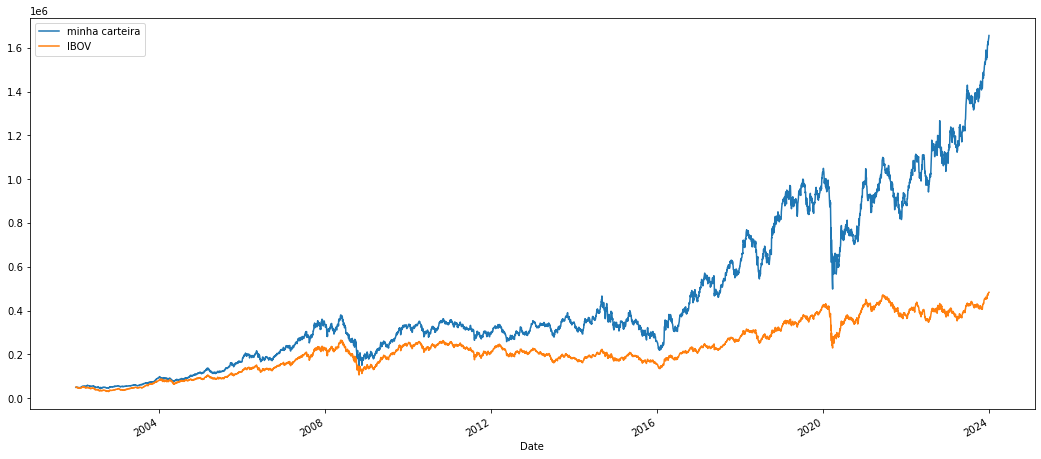

In [125]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()

<AxesSubplot:xlabel='Date'>

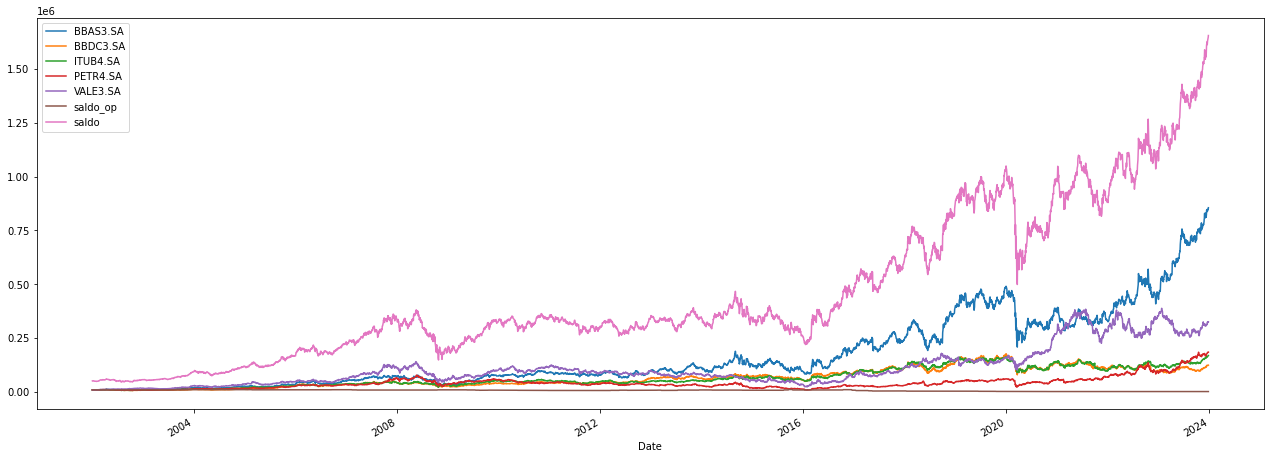

In [126]:
carteira_normalizada.plot(figsize=(22,8))